# Compare different minimization algorithms
# Objective function is
$$ f = (x - 1)^2 + cos(xy) + (y + 1)^2 + sin(x) + sin(y)$$

# Gradient of objective function is
$$ \frac{df}{dx} = 2(x - 1) - ysin(xy) + cos(x)$$
$$ \frac{df}{dy} = -xsin(xy) + 2(y + 1) +cos(y) $$

# Hessian of objective function is
$$ \frac{d^2f}{dx^2} = 2 - y^2cos(xy) - sin(x)$$
$$ \frac{d^2f}{dxdy} = -sin(xy) - xycos(xy) $$
$$ \frac{d^2f}{dy^2} = -x^2cos(xy) + 2 - sin(y) $$



## Define objective function, its gradient, and hessian matrix
## Show the contour plot

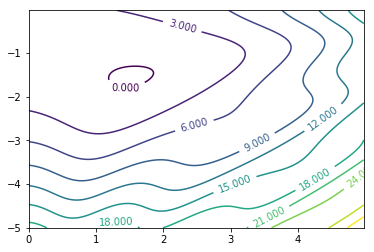

In [296]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return (x - 1)**2 + np.cos(x*y) + (y + 1)**2 + np.sin(x) + np.sin(y)

def gradf(x, y):
    return [2*(x - 1) - y*np.sin(x*y) + np.cos(x), -x*np.sin(x*y) + 2*(y + 1) + np.cos(y)]

def hessianf(x, y):
    h11 = 2 - y**2*np.cos(x*y) - np.sin(x)
    h12 = -np.sin(x*y) - x*y*np.cos(x*y)
    h21 = h12
    h22 = -x**2*np.cos(x*y) + 2 - np.sin(y)
    return [
        [h11, h12],
        [h21, h22]
    ]

delta = 0.03
x = np.arange(0.0, 5.0, delta)
y = np.arange(-5.0, 0.0, delta)
z = [[f(x[i], y[j]) for i in range(x.size)] for j in range(y.size)]


CS = plt.contour(x, y, z, 10)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

# 1. Coordinate descent
# only gradient is used

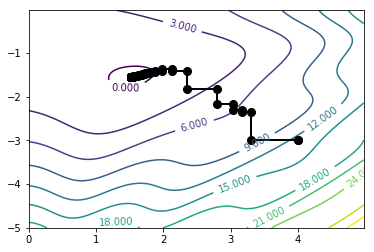

117 -0.135152752538


In [297]:
from matplotlib.path import Path
from matplotlib.patches import PathPatch

# set initial guess of parameters
x0 = 4
y0 = -3

#set convergence tolerance and maximum number of iterations, and stepsize coefficient
tol = 1E-6
nitr = 200
h = 0.1
itr = 0

gf = gradf(x0, y0)
gfabs = np.sqrt(gf[0]**2 + gf[1]**2)

vertices = [(x0, y0)]
codes = [Path.MOVETO]

while gfabs > tol and itr < nitr:
    
    #print itr, 'th step with gradient', gf, 'at', '(', x0, y0, ')', f(x0, y0)
    
    vertices.append((x0, y0))
    codes.append(Path.LINETO)
    
    if itr % 2 == 0:
        #update x only
        x = x0 - h * gf[0]
        x0 = x
    else:
        #update y only
        y = y0 - h * gf[1]
        y0 = y
    gf = gradf(x0, y0)
    gfabs = np.sqrt(gf[0]**2 + gf[1]**2)
    itr += 1

axes = plt.gca()
path = Path(vertices, codes)
patch = PathPatch(path, facecolor='none', lw=2)
axes.add_patch(patch)

xs, ys = zip(*vertices)
axes.plot(xs, ys, '.-', lw=2, color='black', ms=16)

# plot the optimization path
delta = 0.03
x = np.arange(0.0, 5.0, delta)
y = np.arange(-5.0, 0.0, delta)
z = [[f(x[i], y[j]) for i in range(x.size)] for j in range(y.size)]


CS = plt.contour(x, y, z, 10)

plt.clabel(CS, inline=1, fontsize=10)
plt.show()    
print itr, f(x0, y0)

# 2. Gradient descent
# only gradient is used

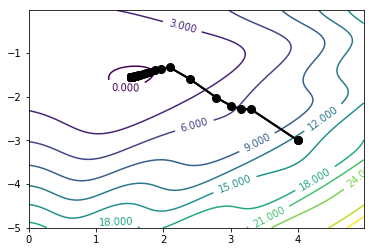

61 -0.135152752538


In [298]:
# set initial guess of parameters
x0 = 4
y0 = -3

#set convergence tolerance and maximum number of iterations, and stepsize coefficient
tol = 1E-6
nitr = 100
h = 0.1
itr = 0

gf = gradf(x0, y0)
gfabs = np.sqrt(gf[0]**2 + gf[1]**2)

vertices = [(x0, y0)]
codes = [Path.MOVETO]

while gfabs > tol and itr < nitr:
    
    #print itr, 'th step with gradient', gf, 'at', '(', x0, y0, ')', f(x0, y0)
    
    vertices.append((x0, y0))
    codes.append(Path.LINETO)
    
    x = x0 - h * gf[0]
    y = y0 - h * gf[1]
    x0 = x
    y0 = y
    gf = gradf(x0, y0)
    gfabs = np.sqrt(gf[0]**2 + gf[1]**2)
    itr += 1
    
axes = plt.gca()
path = Path(vertices, codes)
patch = PathPatch(path, facecolor='none', lw=2)
axes.add_patch(patch)

xs, ys = zip(*vertices)
axes.plot(xs, ys, '.-', lw=2, color='black', ms=16)

# plot the optimization path
delta = 0.03
x = np.arange(0.0, 5.0, delta)
y = np.arange(-5.0, 0.0, delta)
z = [[f(x[i], y[j]) for i in range(x.size)] for j in range(y.size)]


CS = plt.contour(x, y, z, 10)

plt.clabel(CS, inline=1, fontsize=10)
plt.show()    
print itr, f(x0, y0)

# 3. Newton-Raphson Method
# Both gradient and hessian are used


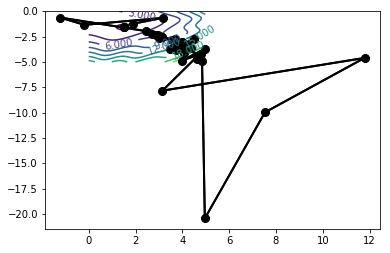

41 -0.135152752539


In [299]:
from numpy.linalg import inv
# set initial guess of parameters
x0 = 4
y0 = -3

#set convergence tolerance and maximum number of iterations
tol = 1E-6
nitr = 50
itr = 0

gf = gradf(x0, y0)
gfabs = np.sqrt(gf[0]**2 + gf[1]**2)

vertices = [(x0, y0)]
codes = [Path.MOVETO]

while gfabs > tol and itr < nitr:
    
    #print itr, 'th step with gradient', gf, 'at', '(', x0, y0, ')', f(x0, y0)
    
    vertices.append((x0, y0))
    codes.append(Path.LINETO)
    
    hessf = hessianf(x0, y0)
    
    stepsize = np.dot(inv(hessf), gf)
    
    x = x0 - stepsize[0]
    y = y0 - stepsize[1]
    
    x0 = x
    y0 = y
    gf = gradf(x0, y0)
    gfabs = np.sqrt(gf[0]**2 + gf[1]**2)
    itr += 1
    
    
axes = plt.gca()
path = Path(vertices, codes)
patch = PathPatch(path, facecolor='none', lw=2)
axes.add_patch(patch)

xs, ys = zip(*vertices)
axes.plot(xs, ys, '.-', lw=2, color='black', ms=16)

# plot the optimization path
delta = 0.03
x = np.arange(0.0, 5.0, delta)
y = np.arange(-5.0, 0.0, delta)
z = [[f(x[i], y[j]) for i in range(x.size)] for j in range(y.size)]


CS = plt.contour(x, y, z, 10)

plt.clabel(CS, inline=1, fontsize=10)
plt.show()
print itr, f(x0,y0)

# 4. Broyden–Fletcher–Goldfarb–Shanno algorithm (BFGS)
# Hessian is calculated non-explicitly, only gradient is used

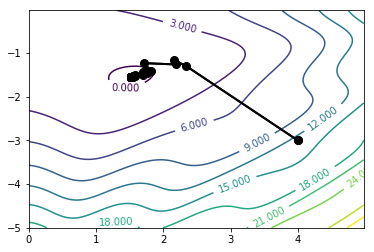

82 -0.135152752538


In [300]:
from numpy.linalg import solve
from numpy.linalg import norm
# set initial guess of parameters
x0 = 4
y0 = -3

#set convergence tolerance and maximum number of iterations
tol = 1E-6
nitr = 300
itr = 0

gf = gradf(x0, y0)
gfabs = np.sqrt(gf[0]**2 + gf[1]**2)

vertices = [(x0, y0)]
codes = [Path.MOVETO]

hessf = [[1, 0], [0, 1]]
    
while gfabs > tol and itr < nitr:
    
    #print itr, 'th step with gradient', gf, 'at', '(', x0, y0, ')', f(x0, y0)
    
    vertices.append((x0, y0))
    codes.append(Path.LINETO)
    
    #1. obtain a direction of search
    negf = [-gf[0], -gf[1]]
    pk = solve(hessf, negf)
    
    #2. perform backtracking linear search
    alpha = 1.0
    c = 0.5
    tor = 0.7
    j = 0
    t = np.dot(pk, np.array(gf)) * (-c)
    while f(x0, y0) - f(x0 + alpha * pk[0], y0 + alpha * pk[1]) < alpha * t:
        alpha = alpha * tor
        j += 1
    #print alpha
    #3. update x
    sk = alpha * pk
    (x, y) = (x0, y0) + sk
    
    #4. calculate yk
    yk = np.subtract(gradf(x, y), gradf(x0, y0))
    
    

    #5. update hessian for next iteration
    sk = np.array(sk).T
    yk = np.array(yk).T
    hessf = hessf + np.dot(yk, yk.T) / np.dot(yk.T, sk) - np.dot(np.dot(hessf, sk), np.dot(sk.T, hessf)) / np.dot(sk.T, np.dot(hessf, sk))
    
    #6. update gradient and gradient norm for next iteration
    x0 = x
    y0 = y
    gf = gradf(x0, y0)
    gfabs = np.sqrt(gf[0]**2 + gf[1]**2)
    itr += 1
    
axes = plt.gca()
path = Path(vertices, codes)
patch = PathPatch(path, facecolor='none', lw=2)
axes.add_patch(patch)

xs, ys = zip(*vertices)
axes.plot(xs, ys, '.-', lw=2, color='black', ms=16)

# plot the optimization path
delta = 0.03
x = np.arange(0.0, 5.0, delta)
y = np.arange(-5.0, 0.0, delta)
z = [[f(x[i], y[j]) for i in range(x.size)] for j in range(y.size)]


CS = plt.contour(x, y, z, 10)

plt.clabel(CS, inline=1, fontsize=10)
plt.show()
print itr, f(x0, y0)    

In [275]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')